In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.full.myfun_model_usefulfuns import *

2023-09-20 10:48:38.310056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


In [2]:
# save the figure
flag_save = False

In [3]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10
2023-09-12_17-01-56_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn-all
2023-09-12_20-58-20_df1-2-3-4-5-6-7-8-9-10-PRE-linlog
2023-09-12_22-17-04_all


## Loading info

In [4]:
# NN
dir_nn2 = "2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

## LIN LOG
dir_linlog = "2023-09-12_20-58-20_df1-2-3-4-5-6-7-8-9-10-PRE-linlog"

### NN2

In [5]:
path = target_dir + dir_nn2
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN2 - Jupyter Notebook.pdf
info_nn2.txt


In [6]:
namefile_nn2 = "/info_nn2.txt"

# Construct a list for header
with open(path + namefile_nn2) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [7]:
info_nn2 = pd.read_csv(path + namefile_nn2, sep=',', usecols= header)

### NN4

In [8]:
path = target_dir + dir_nn4
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN4 - Jupyter Notebook.pdf
info_nn4.txt


In [9]:
namefile_nn4 = "/info_nn4.txt"

# Construct a list for header
with open(path + namefile_nn4) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [10]:
info_nn4 = pd.read_csv(path + namefile_nn4, sep=',', usecols= header)

### NN10

In [11]:
path = target_dir + dir_nn10
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN10 - Jupyter Notebook.pdf
info_nn10.txt


In [12]:
namefile_nn10 = "/info_nn10.txt"

# Construct a list for header
with open(path + namefile_nn10) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [13]:
info_nn10 = pd.read_csv(path + namefile_nn10, sep=',', usecols= header)

### NN info

In [14]:
# For better handling the plot
info_nn = pd.concat([info_nn2, info_nn4, info_nn10]).reset_index()

### Lin Log info

In [15]:
path = target_dir + dir_linlog
for name in sorted(os.listdir(path)):
    print(name)

info_data.txt
v0_df1-2-3-4-5-6-7-8-9-10_1.svg


In [16]:
namefile = '/info_data.txt'

# get the header
with open(path + namefile) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [17]:
info_linlog = pd.read_csv(path + namefile, sep=',', usecols= header).reset_index()

## Make str into numpy arrays in dfs

In [18]:
nn_cols = ['t_list', 'x_list', 'v_list', 'v0_scn']

for col in nn_cols:
    info_nn[col] = info_nn[col].apply(lambda x: x.replace('array','np.array')).apply(eval).apply(np.array)

In [19]:
ll_cols = ['t_list', 'x_list']

for col in ll_cols:
    info_linlog[col] = info_linlog[col].apply(lambda x: x.replace('array','np.array')).apply(eval).apply(np.array)

# Density - in a scene

In [61]:
scn = info_linlog.T[522]
scn

index                                                      522
t_list       [21.560000000000002, 21.610000000000003, 21.66...
x_list       [[55.8842894, 57.05071794, 58.26944336, 59.528...
v0_scn                                               29.263694
L_scn                                                 7.086173
n_scn                                                       76
N. file                                                      3
LWR_flag                                                   Log
processed                                                  pre
Name: 522, dtype: object

In [21]:
t = scn['t_list']
x = scn['x_list']
n = len(scn['x_list'])
ln = 1/n

## Standardization

In [55]:
## Standardize x
xMean = x.mean()
xStd = x.std()
x_std = (x - xMean)/xStd

## Traslate time
t_std = t - t[0]

In [56]:
xMean, xStd

(87.59533700388887, 19.979006364335042)

In [57]:
x, x_std

(array([[ 55.8842894 ,  57.05071794,  58.26944336,  59.52895053,
          60.8201091 ,  62.13559965,  63.46950922,  64.81705566,
          66.17437056],
        [ 71.28351043,  73.08411878,  74.81583499,  76.48604044,
          78.10160016,  79.66890747,  81.19391073,  82.68210706,
          84.13855318],
        [ 96.16390739,  96.75723223,  97.45862477,  98.24887701,
          99.11360651, 100.04169396, 101.02430738, 102.05430255,
         103.12579394],
        [106.35161203, 107.81479674, 109.27798145, 110.74116615,
         112.20435086, 113.66753557, 115.13072027, 116.59390498,
         118.05708969]]),
 array([[-1.58721845, -1.52883574, -1.46783544, -1.40479391, -1.34016815,
         -1.2743245 , -1.20755894, -1.14011082, -1.07217376],
        [-0.81644834, -0.72632332, -0.63964653, -0.5560485 , -0.47518564,
         -0.39673793, -0.32040764, -0.24591963, -0.17302081],
        [ 0.42887871,  0.45857612,  0.4936826 ,  0.53323673,  0.57651864,
          0.62297177,  0.67215407,  

### Plot trajs standardized

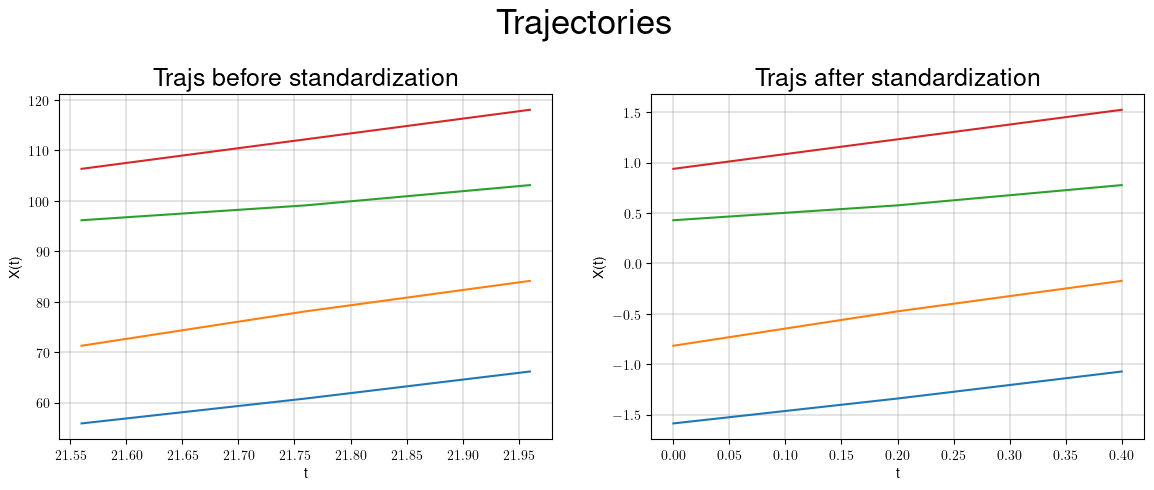

In [104]:
# Initialize the figure
width = 7
height = 5
nfig = 2
fig = plt.figure(figsize = (width*nfig,height))

N = len(x)

# 1. Trajs before standardization
ax1 = fig.add_subplot(1, nfig, 1)
t_matched, x_matched = match_timestamps_scene(t, x)
for veh in range(0,N):
    # X.T (transposed) is the list of trajectories of the vehicles
    ax1.plot(t_matched, x_matched[veh])
ax1.set_xlabel("t")
ax1.set_ylabel("X(t)")
ax1.set_title('Trajs before standardization',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.3);

# 2. Trajs after standardization
ax2 = fig.add_subplot(1, nfig, 2);
t_matched_std, x_matched_std = match_timestamps_scene(t_std, x_std)
for veh in range(0,N):
    # X.T (transposed) is the list of trajectories of the vehicles
    ax2.plot(t_matched_std, x_matched_std[veh])
ax2.set_xlabel("t")
ax2.set_ylabel("X(t)")
ax2.set_title('Trajs after standardization',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.3);

fig.suptitle('Trajectories',fontsize=25, y=0.97);
fig.subplots_adjust(top=0.8)
plt.show();

### Plot

In [82]:
idx = 0

In [86]:
t_fixed = t_std[idx]
pos = x_std[:,idx]
den = np.diff(pos,axis=0)
d = ln/den

In [87]:
pos

array([-1.58721845, -0.81644834,  0.42887871,  0.93879919])

In [88]:
d

array([0.32435093, 0.20075048, 0.49027252])

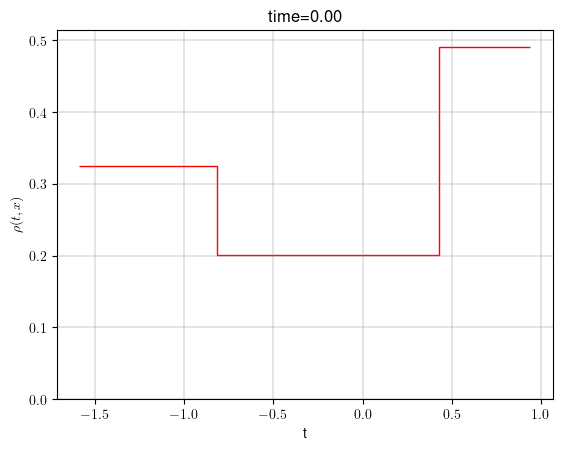

In [100]:
# plt.step(pos[:-1], d, where='post', label='step(where="post")')
plt.stairs(d, pos, baseline=None, color='r')
plt.grid(color='grey', linestyle='-', linewidth=0.3);

fmt = '{:.2f}'
plt.title(f'time={fmt.format(t_fixed)}')
plt.xlabel("t")
plt.ylabel(rf"$\rho(t,x)$")
plt.show()

### Plot all the time

In [36]:
fmt = '{:.2f}'

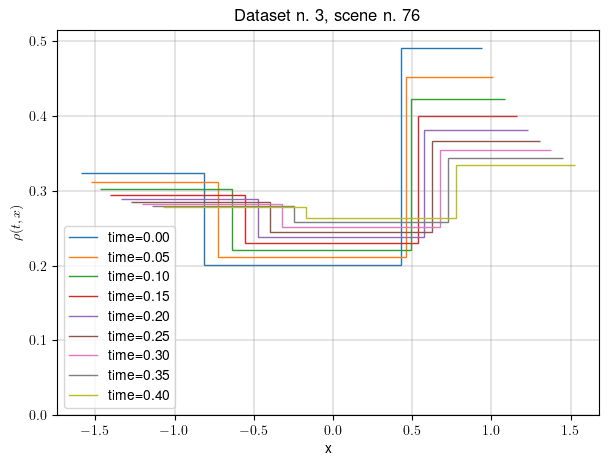

In [102]:
# Create fig
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

for idx in range(len(t)):
    
    pos = x_std[:,idx]
    den = np.diff(pos,axis=0)
    d = ln/den
    
    t_fixed = t_std[idx]
    
    plt.stairs(d, pos, baseline=None, label=f'time={fmt.format(t_fixed)}')
    
ax.set_xlabel("x")
ax.set_ylabel(rf"$\rho(t,x)$")
ax.grid(color='grey', linestyle='-', linewidth=0.3);
ax.legend()

nf, ns = scn['N. file'], scn['n_scn']
plt.title(f'Dataset n. {nf}, scene n. {ns}')
    
plt.show()

In [69]:
scn

index                                                      522
t_list       [21.560000000000002, 21.610000000000003, 21.66...
x_list       [[55.8842894, 57.05071794, 58.26944336, 59.528...
v0_scn                                               29.263694
L_scn                                                 7.086173
n_scn                                                       76
N. file                                                      3
LWR_flag                                                   Log
processed                                                  pre
Name: 522, dtype: object